In [1]:
# Импорт библиотек
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge, Lasso, HuberRegressor, ElasticNet, LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

## Знакомство с данными и их предобработка

In [2]:
# Чтение csv файла и формирование датафрейма.
path = os.path.join(os.getcwd(), 'train.csv')
data = pd.read_csv(path, sep=',')
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
# Информация о наименовании колонок, типах данных, используемой памяти, кол-ве строк и колонок, кол-во непустых 
# значений в колонке.
data.info()
# 81 колонка, 1460 строк. 43 типов object, 38 типов numeric переменных. Есть пустые значения в 19 колонках
# LotFrontage, Alley, MasVnrType, MasVnrArea, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, Electrical, 
# FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageQual, GarageCond, PoolQC, Fence, MiscFeature.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
# ID (unique ID)
print(data['Id'].nunique())
# Удаляем колонку с id, не содержит значимой информации.
data.drop(['Id'], axis=1, inplace=True)

1460


Описание колонок:  
MSSubClass: Класс здания  
MSZoning: Общая классификация зонирования  
LotFrontage: Линейные футы улицы, связанной с собственностью (участок между зданием и дорогой)  
LotArea: Размер участка в квадратных футах  
Street: Тип доступа к дороге  
Alley: Тип доступа к переулку  
LotShape: Общий вид недвижимости  
LandContour: Пологость собственности  
Utilities: Тип доступных утилит  
LotConfig: Конфигурация лота  
LandSlope: Уклон собственности  
Neighborhood: Физические местоположения в черте города Эймс  
Condition1: Близость к главной дороге или железной дороге  
Condition2: Близость к главной дороге или железной дороге (если есть вторая)  
BldgType: Тип жилья  
HouseStyle: Стиль проживания  
OverallQual: Общее качество материала и отделки  
OverallCond: Общая оценка состояния  
YearBuilt: Первоначальная дата постройки  
YearRemodAdd: Дата реконструкции  
RoofStyle: Тип крыши  
RoofMatl: Материал крыши  
Exterior1st: Наружное покрытие дома  
Exterior2nd: Наружное покрытие дома (если более одного материала)  
MasVnrType: Кирпичная кладка типа шпона  
MasVnrArea: Площадь каменной кладки в квадратных метрах  
ExterQual: Качество материалов экстерьера  
ExterCond: Текущее состояние материала снаружи  
Foundation: Тип фундамента  
BsmtQual: Высота подвала (цокольного этажа)  
BsmtCond: Общее состояние подвала  
BsmtExposure: Выходные или подвальные стены на уровне сада  
BsmtFinType1: Качество отделки цокольного этажа  
BsmtFinSF1: Тип 1 готовые, в квадратных футах  
BsmtFinType2: Качество второй обработанной области (если есть)  
BsmtFinSF2: Тип 2 готовые, в квадратных футах  
BsmtUnfSF: Незавершенные квадратные метры цокольного этажа  
TotalBsmtSF: Общая площадь подвала в квадратных метрах  
Heating: Тип отопления  
HeatingQC: Качество и состояние отопления  
CentralAir: Центральное кондиционирование  
Electrical: Электрическая система  
1stFlrSF: Квадратные футы первого этажа  
2ndFlrSF: Квадратные футы второго этажа  
LowQualFinSF: Квадратные футы с отделкой низкого качества (все этажи)  
GrLivArea: Надземная (земля) жилая площадь в квадратных футах  
BsmtFullBath: Полноценные санузлы на цокольном этаже  
BsmtHalfBath: Полуванные комнаты на цокольном этаже  
FullBath: Полноценные ванные комнаты выше цоколя  
HalfBath: Полуванные комнаты выше цоколя  
BedroomAbvGr: Количество спален выше цокольного этажа  
KitchenAbvGr: Количество кухонь выше цокольного этажа  
KitchenQual: Качество кухни  
TotRmsAbvGrd: Всего комнат выше цокольного (без ванных комнат)  
Functional: Рейтинг домашней функциональности  
Fireplaces: Количество каминов  
FireplaceQu: Качество камина  
GarageType: Расположение гаража  
GarageYrBlt: Год постройки гаража  
GarageFinish: Внутренняя отделка гаража  
GarageCars: Размер гаража вместимость автомобиля  
GarageArea: Площадь гаража в квадратных метрах  
GarageQual: Качество гаража  
GarageCond: Состояние гаража  
PavedDrive: Асфальтированная дорога  
WoodDeckSF: Площадь деревянного настила в квадратных футах  
OpenPorchSF: Площадь открытой веранды в квадратных футах  
EnclosedPorch: Площадь крыльца в квадратных футах  
3SsnPorch: Площадь трехсезонного крыльца в квадратных футах  
ScreenPorch: Площадь веранды в квадратных футах  
PoolArea: Площадь бассейна в квадратных футах  
PoolQC: Качество бассейна  
Fence: Качество забора  
MiscFeature: Разная функция, не включенная в другие категории  
MiscVal: Значение различных функций  
MoSold: Месяц продажи  
YrSold: Год продажи  
SaleType: Тип продажи  
SaleCondition: Условия продажи  

In [5]:
# Уникальные значения для всех колонок датасета
for col in data.columns:
    print(data[col].value_counts())
    print('*'*30)

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64
******************************
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
******************************
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
106.0      1
38.0       1
138.0      1
140.0      1
137.0      1
Name: LotFrontage, Length: 110, dtype: int64
******************************
7200     25
9600     24
6000     17
10800    14
9000     14
         ..
7094      1
6130      1
9337      1
5232      1
8190      1
Name: LotArea, Length: 1073, dtype: int64
******************************
Pave    1454
Grvl       6
Name: Street, dtype: int64
******************************
Grvl    50
Pave    41
Name: Alley, dtype: int64
******************************
Reg    925
IR1    484
IR2     41
IR3     10
Na

Name: Functional, dtype: int64
******************************
0    690
1    650
2    115
3      5
Name: Fireplaces, dtype: int64
******************************
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64
******************************
Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64
******************************
2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1908.0     1
1927.0     1
1933.0     1
1900.0     1
1906.0     1
Name: GarageYrBlt, Length: 97, dtype: int64
******************************
Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64
******************************
2    824
1    369
3    181
0     81
4      5
Name: GarageCars, dtype: int64
******************************
0       81
440     49
576     47
240     38
484     34
        ..
754      1
459      1
458      1
756      1
1418     1
Name: GarageArea, Length: 441, d

Skewness: 1.882876
Kurtosis: 6.536282


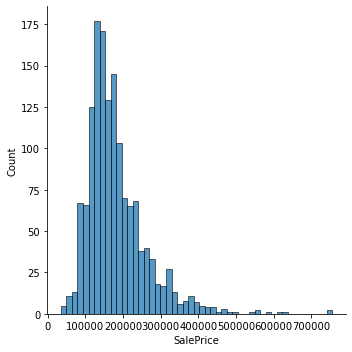

In [6]:
# SalePrice - цена продажи недвижимости, в долларах.Target column.
sns.displot(data['SalePrice'])
# Skewness и Kurtosis
print("Skewness: %f" % data['SalePrice'].skew()) # skewed to the right
print("Kurtosis: %f" % data['SalePrice'].kurt()) 

Skewness: 0.121335
Kurtosis: 0.809532


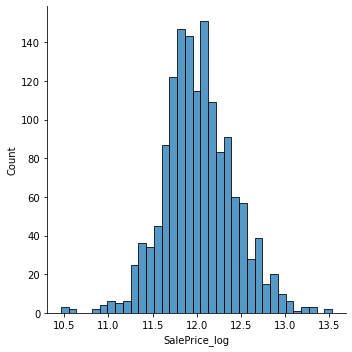

In [7]:
# Распределение целевого признака не нормальное, применим логарифмическую трансформацию по основанию е.
data['SalePrice_log'] = np.log(data['SalePrice'])
sns.displot(data['SalePrice_log']);
# Skewness and Kurtosis
print("Skewness: %f" % data['SalePrice_log'].skew())
print("Kurtosis: %f" % data['SalePrice_log'].kurt())

In [8]:
# Выведем кол-во пустых значений и % пустых значений в 19 колонках.
data_miss = data.isnull().sum()
percent_data_miss = round(data_miss/data.shape[0], 3)
missing_data = pd.concat([data_miss, percent_data_miss], axis=1, keys=['count_null', 'percent_null'])
missing_data[missing_data['count_null'] != 0].sort_values(by='count_null', ascending=False)

,count_null,percent_null
PoolQC,1453,0.995
MiscFeature,1406,0.963
Alley,1369,0.938
Fence,1179,0.808
FireplaceQu,690,0.473
LotFrontage,259,0.177
GarageType,81,0.055
GarageYrBlt,81,0.055
GarageFinish,81,0.055
GarageQual,81,0.055


Исходя из описания и value_counts по колонкам PoolQC и PoolArea(7 домов имеют бассейн), пропущенные значения PoolQC заполняем как 'None'.  
Исходя из описания и value_counts по колонкам MiscFeature и MiscVal (1408 домов не имеют разных функций, не включенных в другие категории), пропущенные значения MiscFeature заполняем как 'None'.  
Исходя из описания и value_counts по колонкам Alley и Street (91 дом имеет доступ к переулку), пропущенные значения Alley заполняем как 'None'.  
Исходя из описания и value_counts по колонке Fence (281 дом имеет забор), пропущенные значения Fence заполняем как 'None'.  
Исходя из описания и value_counts по колонкам FireplaceQu и Fireplaces (770 дом имеют камины и только их качество оценивается), пропущенные значения FireplaceQu заполняем как 'None'.  
Исходя из описания и value_counts по колонкам GarageCars и GarageArea (81 дом без гаража) пропущенные значения GarageType, GarageFinish, GarageQual, GarageCond заполняем как 'None', а пропущенные значения GarageYrBlt как 0.  
Исходя из описания и value_counts по колонке TotalBsmtSF, BsmtExposure, BsmtFinType2 (37 домов без подвала, общая площадь - 0; Выходные или подвальные стены на уровне сада и Качество второй обработанной области (если есть) нет у одного дома, где есть подвал) пропущенные значения BsmtExposure, BsmtFinType2, BsmtFinType1, BsmtCond, BsmtQual заполняем как 'None'.  

In [9]:
# Заполняем пропущенные значения по написанным выше колонкам.
data['GarageYrBlt'] = data['GarageYrBlt'].fillna(0)
fill_cols = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', \
             'GarageCond', 'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual']
for col in fill_cols:
    data[col] = data[col].fillna('None')

In [10]:
# Описательная статистика для колонки LotFrontage, среднее около 70 футов, медиана - 69, максимум - 313, минимум - 21.
data['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [11]:
# Исходя из описания и value_counts по колонке LotFrontage, площадь каждой улицы, связанная с домом, скорее всего, имеет 
# такую же площадь, что и другие дома в этом районе, мы можем заполнить пропущенные значения медианой LotFrontage района, 
# сгруппированного по колонке Neighborhood. 
data['LotFrontage'] = data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))
data['LotFrontage']

0       65.0
1       80.0
2       68.0
3       60.0
4       84.0
        ... 
1455    62.0
1456    85.0
1457    66.0
1458    68.0
1459    75.0
Name: LotFrontage, Length: 1460, dtype: float64

In [12]:
# Описательная статистика для колонки LotFrontage после заполнения пропущенных значений, 
# среднее около 70 футов, медиана - 70, максимум - 313, минимум - 21.
data['LotFrontage'].describe()

count    1460.000000
mean       70.199658
std        22.431902
min        21.000000
25%        60.000000
50%        70.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [13]:
# Колонка Electrical имеет 1 пропущенное значение, заполним его модой.
data['Electrical'] = data['Electrical'].fillna(data['Electrical'].mode()[0])
data['Electrical'].value_counts()

SBrkr    1335
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [14]:
# Исходя из описания и value_counts по колонкам MasVnrArea и MasVnrType, пропущенные значения MasVnrArea, MasVnrType 
# заполняем модой по этим колонкам.
data['MasVnrArea'] = data['MasVnrArea'].fillna(data['MasVnrArea'].mode()[0])
data['MasVnrType'] = data['MasVnrType'].fillna(data['MasVnrType'].mode()[0])
print(data['MasVnrArea'].value_counts())
data['MasVnrType'].value_counts()

0.0      869
72.0       8
180.0      8
108.0      8
120.0      7
        ... 
651.0      1
337.0      1
415.0      1
293.0      1
621.0      1
Name: MasVnrArea, Length: 327, dtype: int64


None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [15]:
# Проверка заполнения пропущенных значений. Пропущенных значений в колонках нет.
print(data.isnull().sum().sum())
data.isna().sum().sum()

0


0

In [16]:
# Добавим колонку Age_house (возраст дома с года постройки до года продажи). Среднее - 36,5 лет, медиана - 35 лет, мин - 0 лет,
# макс - 136 лет.
data['Age_house'] = data['YrSold'] - data['YearBuilt']
data['Age_house'].describe()

count    1460.000000
mean       36.547945
std        30.250152
min         0.000000
25%         8.000000
50%        35.000000
75%        54.000000
max       136.000000
Name: Age_house, dtype: float64

In [17]:
# 122 уникальных значения по колонке возраст дома с года постройки до года продажи. 64 дома продано в год постройки.
data['Age_house'].value_counts()

1      100
0       64
4       41
2       39
3       36
      ... 
79       1
109      1
135      1
107      1
136      1
Name: Age_house, Length: 122, dtype: int64

In [18]:
# Добавим колонку Total_SF (общая площадь цокольного, первого, второго этажей дома). Среднее - 2567 кв.футов,
# мин - 334 кв. фута, медиана - 2474 кв.фута, макс - 11752 кв. фута.
data['Total_SF'] = data['TotalBsmtSF'] + data['1stFlrSF'] + data['2ndFlrSF']
data['Total_SF'].describe()

count     1460.000000
mean      2567.048630
std        821.714421
min        334.000000
25%       2009.500000
50%       2474.000000
75%       3004.000000
max      11752.000000
Name: Total_SF, dtype: float64

In [19]:
# 963 уникальных значения по колонке общая площадь цоколя, 1-го и 2-го этажей.
data['Total_SF'].value_counts()

1728    22
1788    12
1696    11
1632    10
2184     9
        ..
3264     1
3691     1
3259     1
3254     1
2048     1
Name: Total_SF, Length: 963, dtype: int64

In [20]:
# Удалем колонку Utilities, поскольку практически все значения это AllPub - 1459, NoSeWa - 1.
# Удаляем колонки Street (99,5% значений относится к одной категории Pave), 
# PoolQC (99,5% значений относится к одной категории None)
data.drop(['Utilities', 'Street', 'PoolQC'], axis=1, inplace=True)

In [21]:
# Уменьшение кол-ва категорий для колонок Condition2, Exterior1st, MiscFeature, RoofMatl
reduce_cols = ['Condition2', 'Exterior1st', 'MiscFeature']
def reduce_cat(num, cols):
    for col in cols:
        group_count = data[col].value_counts()
        for group in group_count.index:
            if group_count[group] < num:
                data.loc[data[col] == group, col] = 'Other'
reduce_cat(3, reduce_cols)
reduce_cat(2, ['RoofMatl'])
for col in reduce_cols:
    print(data[col].value_counts())
    print('*'*30)
data['RoofMatl'].value_counts()

Norm     1445
Other       9
Feedr       6
Name: Condition2, dtype: int64
******************************
VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
Other        7
Name: Exterior1st, dtype: int64
******************************
None     1406
Shed       49
Other       5
Name: MiscFeature, dtype: int64
******************************


CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Other         4
Name: RoofMatl, dtype: int64

In [22]:
# Перестановка колонок с ценами.
cols = data[['SalePrice', 'SalePrice_log']]
data.drop(['SalePrice', 'SalePrice_log'], axis=1, inplace=True)
data = pd.concat([data, cols], axis=1)
data

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Age_house,Total_SF,SalePrice,SalePrice_log
0,60,RL,65.0,8450,None,Reg,Lvl,Inside,Gtl,CollgCr,...,None,0,2,2008,WD,Normal,5,2566,208500,12.247694
1,20,RL,80.0,9600,None,Reg,Lvl,FR2,Gtl,Veenker,...,None,0,5,2007,WD,Normal,31,2524,181500,12.109011
2,60,RL,68.0,11250,None,IR1,Lvl,Inside,Gtl,CollgCr,...,None,0,9,2008,WD,Normal,7,2706,223500,12.317167
3,70,RL,60.0,9550,None,IR1,Lvl,Corner,Gtl,Crawfor,...,None,0,2,2006,WD,Abnorml,91,2473,140000,11.849398
4,60,RL,84.0,14260,None,IR1,Lvl,FR2,Gtl,NoRidge,...,None,0,12,2008,WD,Normal,8,3343,250000,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,None,Reg,Lvl,Inside,Gtl,Gilbert,...,None,0,8,2007,WD,Normal,8,2600,175000,12.072541
1456,20,RL,85.0,13175,None,Reg,Lvl,Inside,Gtl,NWAmes,...,None,0,2,2010,WD,Normal,32,3615,210000,12.254863
1457,70,RL,66.0,9042,None,Reg,Lvl,Inside,Gtl,Crawfor,...,Shed,2500,5,2010,WD,Normal,69,3492,266500,12.493130
1458,20,RL,68.0,9717,None,Reg,Lvl,Inside,Gtl,NAmes,...,None,0,4,2010,WD,Normal,60,2156,142125,11.864462


In [23]:
# Категориальные признаки (колонки) - 43 шт., 35 шт. числовых.
# Категории представлены в виде цифр в колонках 'OverallQual', 'OverallCond'
cat_cols = ['MSSubClass', 'MSZoning', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', \
            'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', \
            'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', \
            'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', \
            'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'Fence', \
            'MiscFeature', 'SaleType', 'SaleCondition']
len(cat_cols)

41

In [24]:
# Преобразование категорий в числовую форму
label_encoder = LabelEncoder()
for col in cat_cols:
    data[col] = label_encoder.fit_transform(data[col])
data

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Age_house,Total_SF,SalePrice,SalePrice_log
0,5,3,65.0,8450,1,3,3,4,0,5,...,0,0,2,2008,8,4,5,2566,208500,12.247694
1,0,3,80.0,9600,1,3,3,2,0,24,...,0,0,5,2007,8,4,31,2524,181500,12.109011
2,5,3,68.0,11250,1,0,3,4,0,5,...,0,0,9,2008,8,4,7,2706,223500,12.317167
3,6,3,60.0,9550,1,0,3,0,0,6,...,0,0,2,2006,8,0,91,2473,140000,11.849398
4,5,3,84.0,14260,1,0,3,2,0,15,...,0,0,12,2008,8,4,8,3343,250000,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,5,3,62.0,7917,1,3,3,4,0,8,...,0,0,8,2007,8,4,8,2600,175000,12.072541
1456,0,3,85.0,13175,1,3,3,4,0,14,...,0,0,2,2010,8,4,32,3615,210000,12.254863
1457,6,3,66.0,9042,1,3,3,4,0,6,...,2,2500,5,2010,8,4,69,3492,266500,12.493130
1458,0,3,68.0,9717,1,3,3,4,0,12,...,0,0,4,2010,8,4,60,2156,142125,11.864462


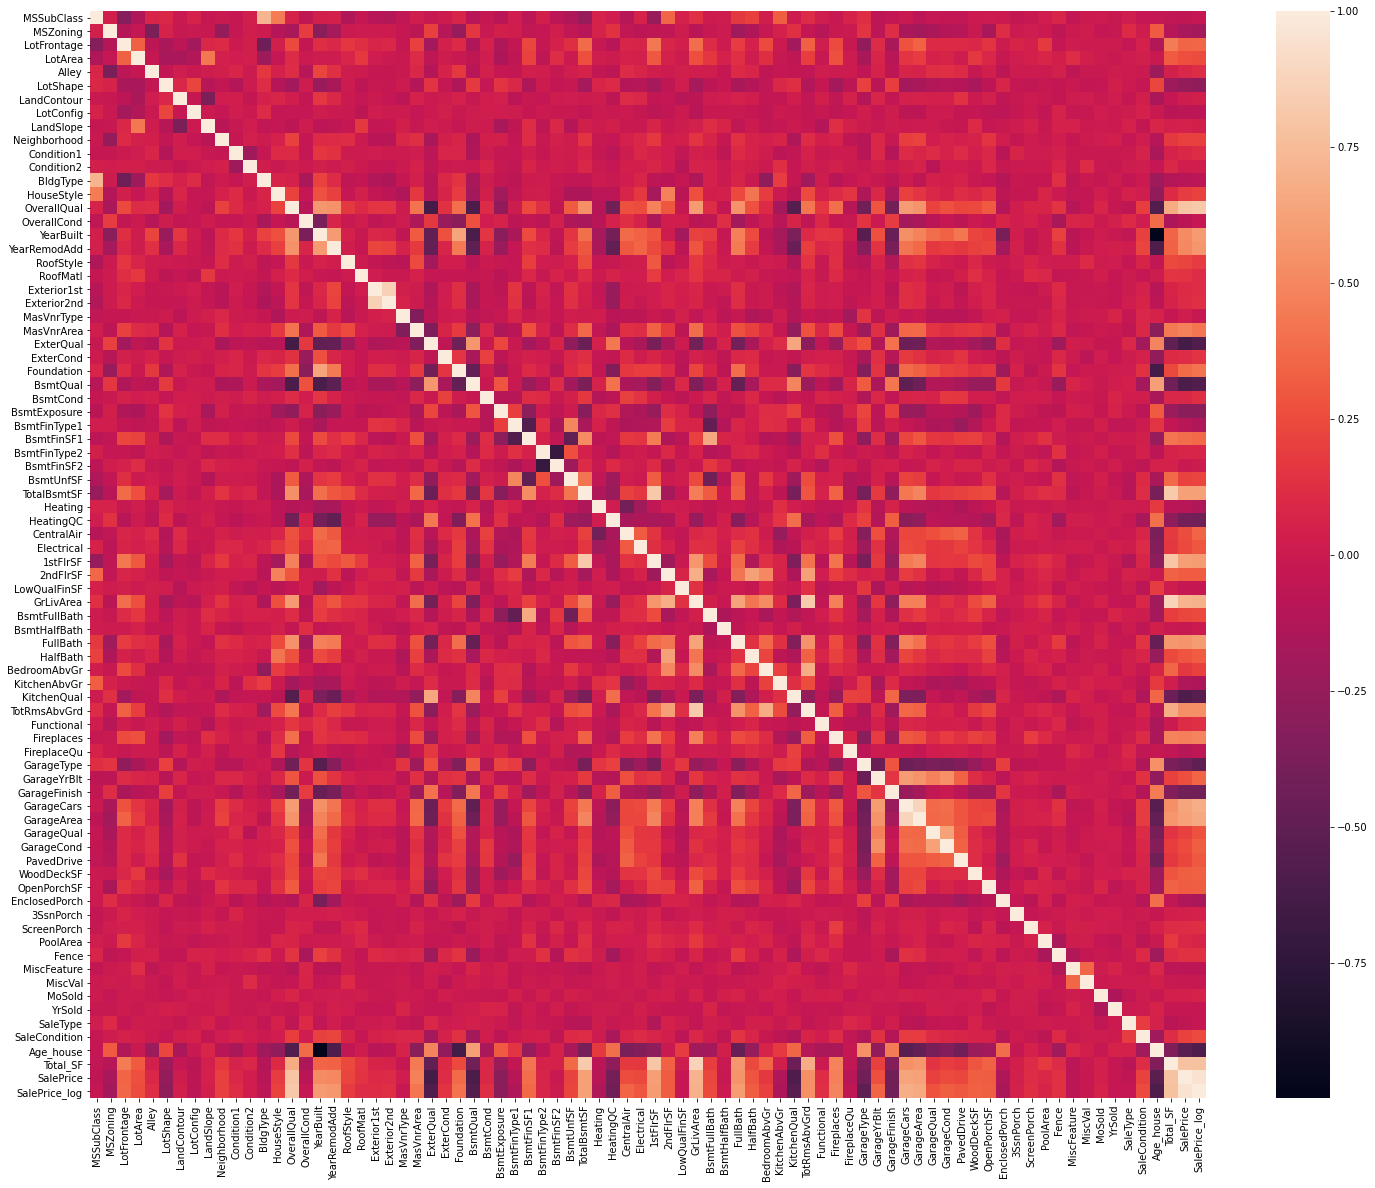

In [25]:
# Корелляция между признаками, есть мультиколлинеарность.
plt.figure(figsize=(25, 20))
sns.heatmap(data.corr())
plt.show()

In [26]:
# Корреляция target column SalePrice_log с признаками
pd.options.display.max_rows = 85
corr_col = pd.DataFrame([[col, data['SalePrice_log'].corr(data[col])] for col in data.columns], \
                        columns=['Column', 'Corr_price'])
corr_col.sort_values(by='Corr_price', ascending=False)

,Column,Corr_price
79,SalePrice_log,1.000000
78,SalePrice,0.948374
14,OverallQual,0.817184
77,Total_SF,0.777296
43,GrLivArea,0.700927
58,GarageCars,0.680625
59,GarageArea,0.650888
35,TotalBsmtSF,0.612134
40,1stFlrSF,0.596981
46,FullBath,0.594771


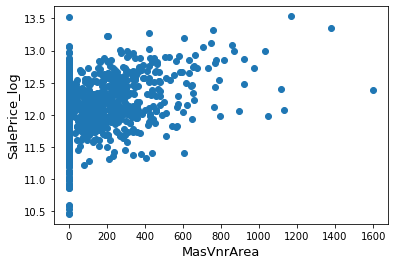

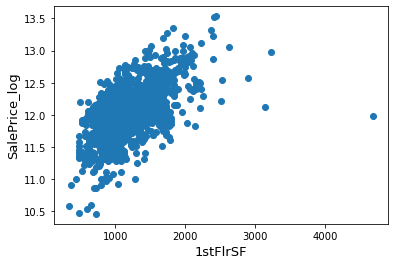

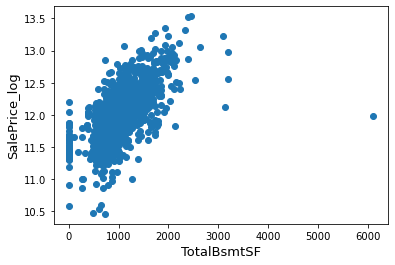

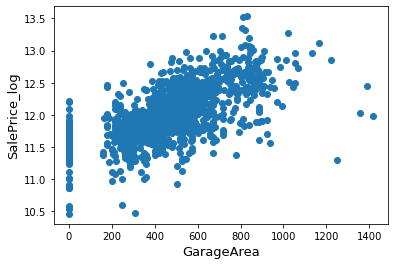

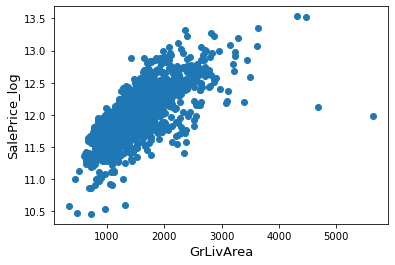

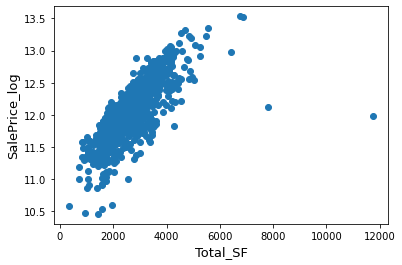

In [27]:
# Графики признак-target с положительной корелляцией более 0.4, признак является площадью, есть выбросы.
sf_col = ['MasVnrArea', '1stFlrSF', 'TotalBsmtSF', 'GarageArea', 'GrLivArea', 'Total_SF']
for col in sf_col:
    plt.scatter(x = data[col], y = data['SalePrice_log'])
    plt.ylabel('SalePrice_log', fontsize=13)
    plt.xlabel(col, fontsize=13)
    plt.show()

In [28]:
# Уберем в колонке GrLivArea 2 выброса, которые имеют большую жилую площадь, но стоят недорого.
data.drop(data[(data['GrLivArea'] > 4000) & (data['SalePrice_log'] < 12.5)].index, inplace=True)
data.shape

(1458, 80)

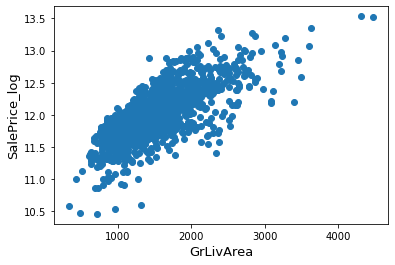

In [29]:
# График GrLivArea-SalePrice_log без выбросов.
plt.scatter(x = data['GrLivArea'], y = data['SalePrice_log'])
plt.ylabel('SalePrice_log', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

In [30]:
# Запишем признаки в переменную X, целевой признак в переменную y.
X = data.drop(['SalePrice', 'SalePrice_log'], axis=1)
y = data['SalePrice_log']
X

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,PoolArea,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Age_house,Total_SF
0,5,3,65.0,8450,1,3,3,4,0,5,...,0,4,0,0,2,2008,8,4,5,2566
1,0,3,80.0,9600,1,3,3,2,0,24,...,0,4,0,0,5,2007,8,4,31,2524
2,5,3,68.0,11250,1,0,3,4,0,5,...,0,4,0,0,9,2008,8,4,7,2706
3,6,3,60.0,9550,1,0,3,0,0,6,...,0,4,0,0,2,2006,8,0,91,2473
4,5,3,84.0,14260,1,0,3,2,0,15,...,0,4,0,0,12,2008,8,4,8,3343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,5,3,62.0,7917,1,3,3,4,0,8,...,0,4,0,0,8,2007,8,4,8,2600
1456,0,3,85.0,13175,1,3,3,4,0,14,...,0,2,0,0,2,2010,8,4,32,3615
1457,6,3,66.0,9042,1,3,3,4,0,6,...,0,0,2,2500,5,2010,8,4,69,3492
1458,0,3,68.0,9717,1,3,3,4,0,12,...,0,4,0,0,4,2010,8,4,60,2156


In [31]:
# Разделим датафрейм на обучающую и тестовую выборки.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=13)

## Стандартизация признаков, обучение моделей и оценка качества

In [32]:
# Функция инициализации StandardScaler() для стандартизации количественных признаков и применение его на выборки,
# применения модели, подбор некоторых параметров и отображения оценки качества модели.
# Допустим нам надо понять, какую долю разнообразия данных модель смогла объяснить, смотрим на коэффициент детерминации. 
# Чем ближе к 1, тем лучше. Дополнительно выводим другие оценки.
def model_display_metrics(model, X_train, y_train, X_test, y_test, n=1, param=None, model_params=None):
    if model_params is None:
        model_params = dict()
    print(model.__name__)
    scaler = StandardScaler()
    grid_search = GridSearchCV(model(**model_params), param_grid=param, cv=10, n_jobs=-1, verbose=1, scoring='r2')
    poly = PolynomialFeatures(degree=n)
    if n == 1:
        pipeline = make_pipeline(scaler, grid_search)
    else:
        pipeline = make_pipeline(poly, scaler, grid_search)
    model_ml = pipeline.fit(X_train, y_train)
    best_estimator = model_ml['gridsearchcv'].best_estimator_
    print(f'Best estimator for {model.__name__}:', best_estimator)
    best_score = model_ml['gridsearchcv'].best_score_
    print(f'Best score for {model.__name__}:', best_score)
    best_params = model_ml['gridsearchcv'].best_params_
    print(f'Params for {model.__name__}:', best_params)
    y_pred = model_ml.predict(X_test)
    
    MAE = round(mean_absolute_error(y_test, y_pred), 3)
    MSE = round(mean_squared_error(y_test, y_pred), 3)
    MAPE = round(mean_absolute_percentage_error(y_test, y_pred), 3)
    R2 = round(r2_score(y_test, y_pred), 3)
    print('MAE:', MAE)
    print('MSE:', MSE)
    print('MAPE:', MAPE)
    print('R^2:', R2)
     
    if n == 1:
        coefs = pd.DataFrame({'Column': X_train.columns, 'Coef': best_estimator.coef_})
        sort_coefs = coefs.sort_values(by='Coef')
        plt.figure(figsize=(25, 20))
        sns.barplot(data=sort_coefs, y='Column', x='Coef', orient='h')
        plt.title(f'Coefficients in the {model.__name__}', fontsize=16)
        plt.show()
    
    return [MAE, MSE, MAPE, R2, best_estimator, best_params, best_score]

In [33]:
# Параметры для LinearRegression
LinearRegression().get_params().keys()

dict_keys(['copy_X', 'fit_intercept', 'n_jobs', 'normalize', 'positive'])

LinearRegression
Fitting 10 folds for each of 4 candidates, totalling 40 fits
Best estimator for LinearRegression: LinearRegression(n_jobs=-1)
Best score for LinearRegression: 0.907827712810487
Params for LinearRegression: {'fit_intercept': True, 'n_jobs': -1}
MAE: 0.092
MSE: 0.018
MAPE: 0.008
R^2: 0.881


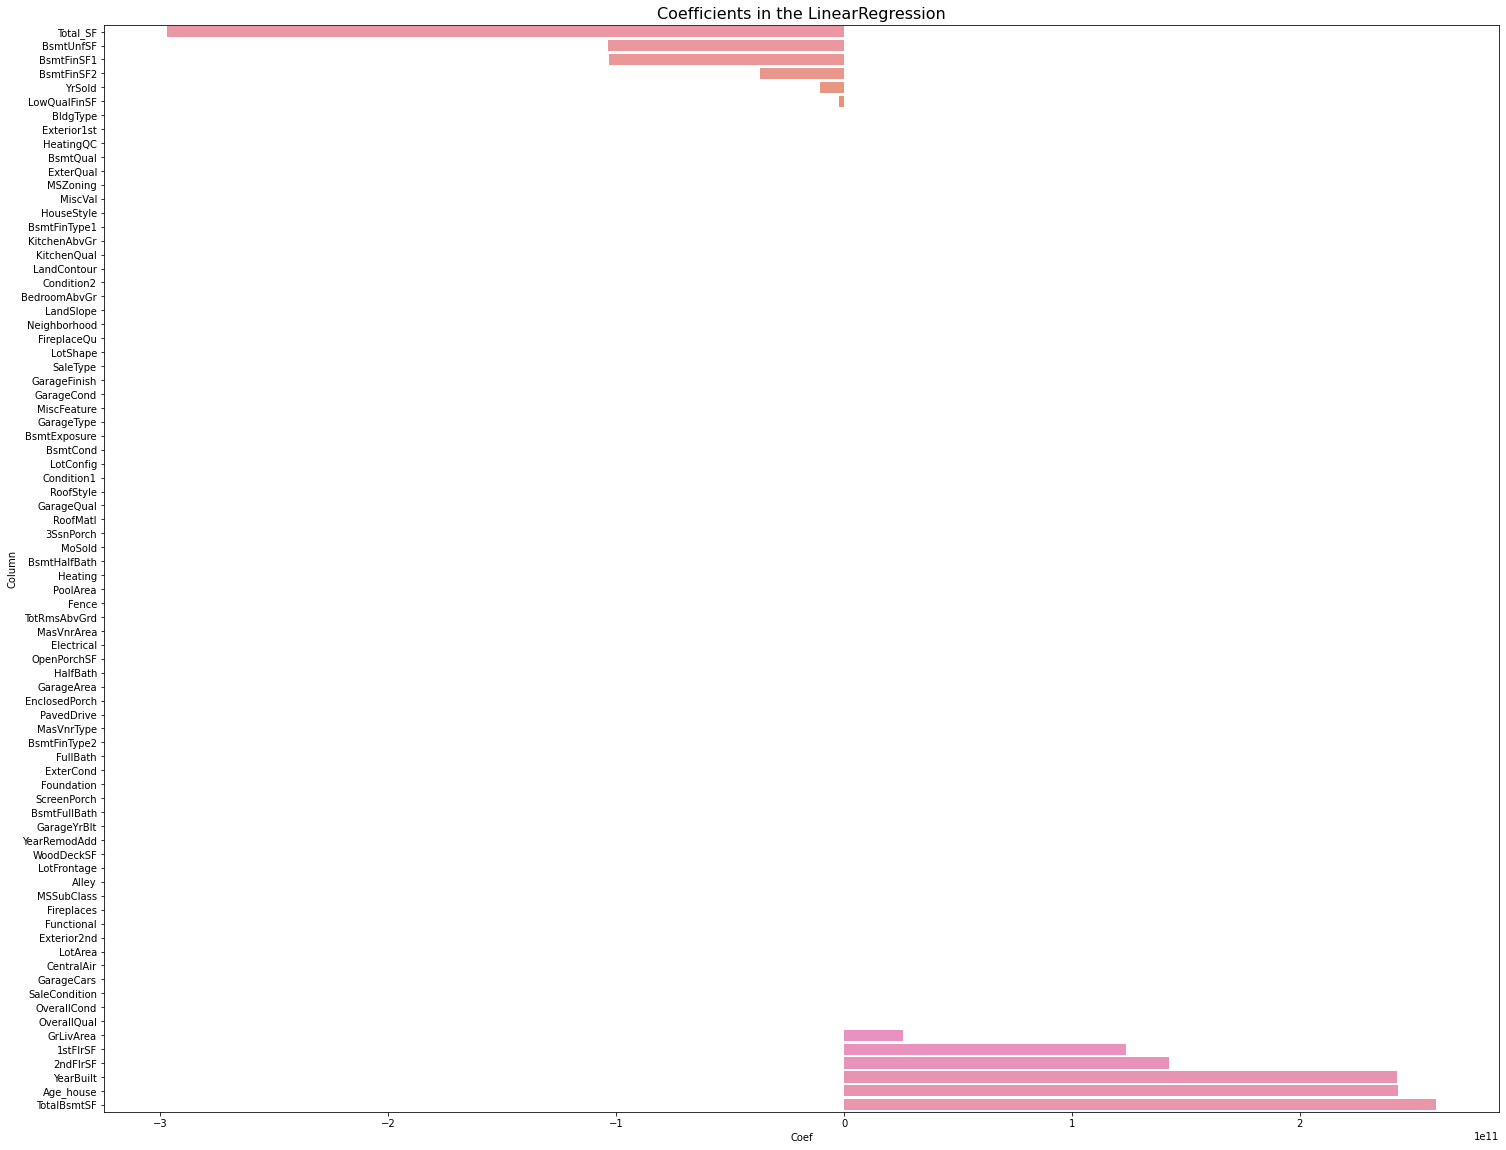

In [34]:
# LinearRegression
parameter_Linear = param={'n_jobs': [-1, None], 'fit_intercept': [True, False]}
metrics_Linear = model_display_metrics(LinearRegression, X_train, y_train, X_test, y_test, param=parameter_Linear)

In [35]:
# Параметры для Lasso
Lasso().get_params().keys()

dict_keys(['alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'positive', 'precompute', 'random_state', 'selection', 'tol', 'warm_start'])

Lasso
Fitting 10 folds for each of 48 candidates, totalling 480 fits
Best estimator for Lasso: Lasso(alpha=0.001, random_state=42, tol=0.0005)
Best score for Lasso: 0.9089783495675947
Params for Lasso: {'alpha': 0.001, 'tol': 0.0005}
MAE: 0.091
MSE: 0.017
MAPE: 0.008
R^2: 0.885


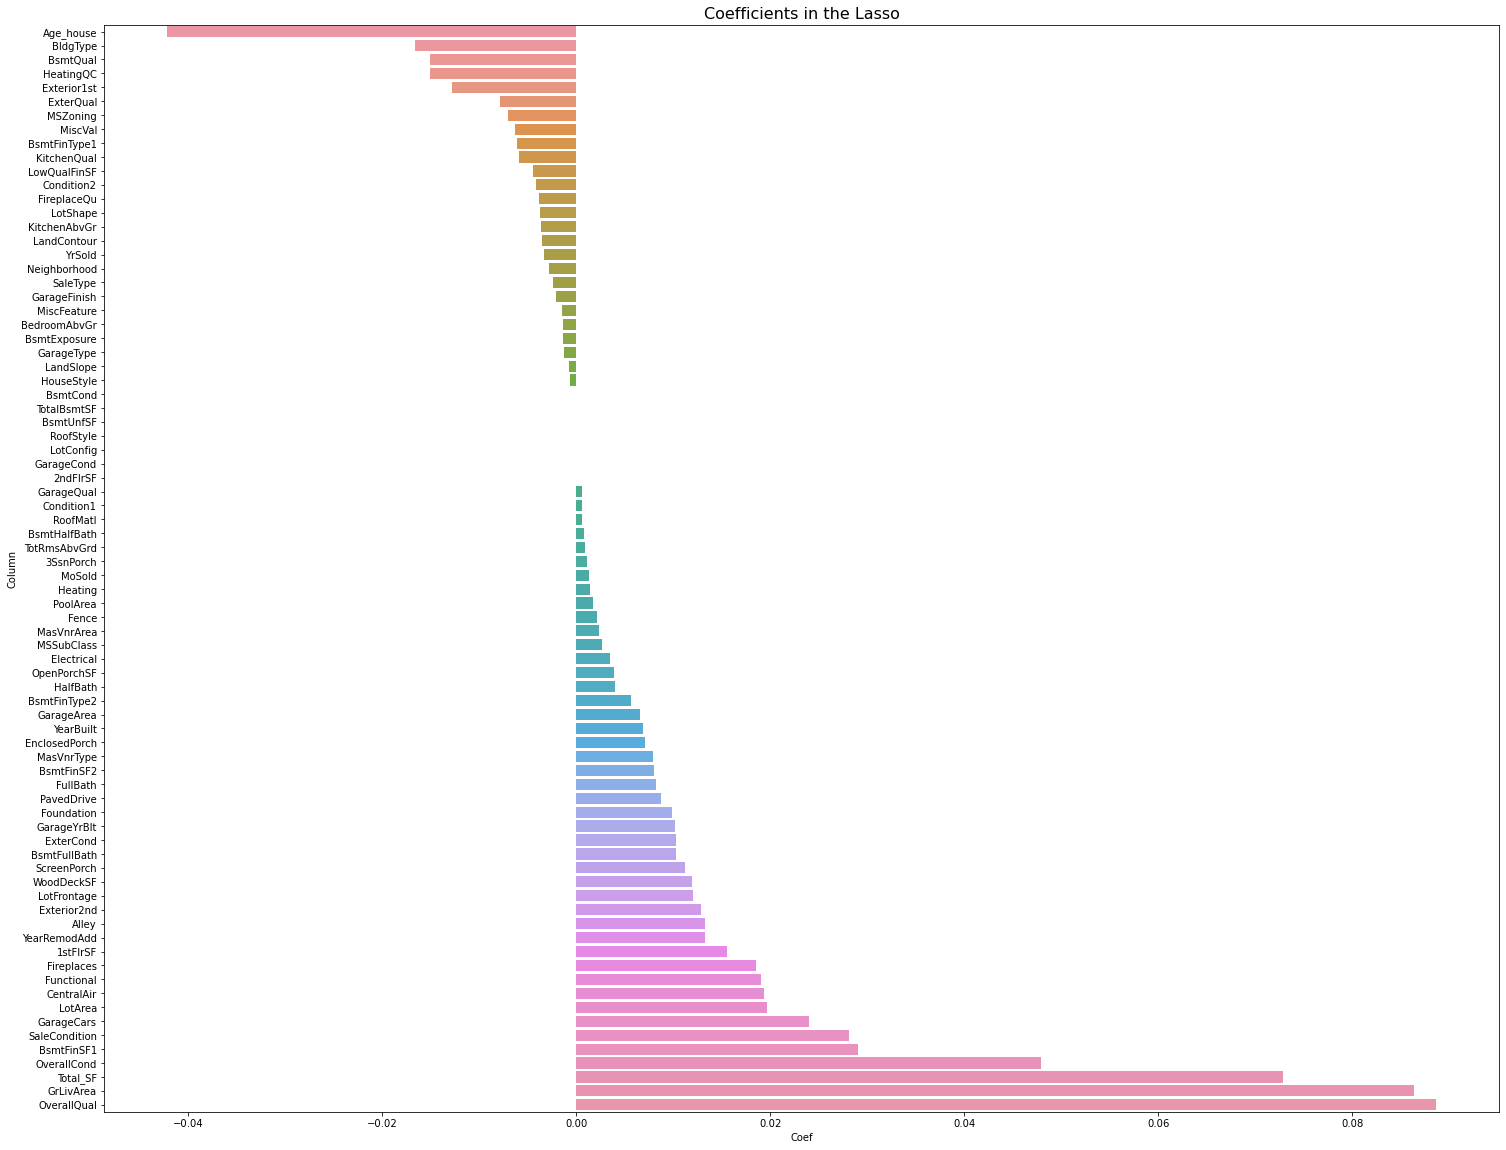

In [36]:
# Lasso
parameter_Lasso = {'alpha': [1e-05, 1e-04, 1e-03, 0.01 , 0.1, 0.5, 1, 10], 
                   'tol': [1e-06, 1e-05, 5e-05, 1e-04, 5e-04, 1e-03]}
metrics_Lasso = model_display_metrics(Lasso, X_train, y_train, X_test, y_test, param=parameter_Lasso,
                                  model_params=dict(random_state=42))

In [37]:
# Lasso polynomial
# n > 2 не дает хорошего результата.
parameter_Lasso_poly = {'alpha': [1e-03, 0.01 , 0.1], 
                   'tol': [1e-05, 1e-04, 1e-03]}
metrics_Lasso_poly = model_display_metrics(Lasso, X_train, y_train, X_test, y_test, n=2, param=parameter_Lasso_poly,
                                  model_params=dict(random_state=32))

Lasso
Fitting 10 folds for each of 9 candidates, totalling 90 fits
Best estimator for Lasso: Lasso(alpha=0.01, random_state=32, tol=0.001)
Best score for Lasso: 0.9092618545168806
Params for Lasso: {'alpha': 0.01, 'tol': 0.001}
MAE: 0.09
MSE: 0.017
MAPE: 0.008
R^2: 0.886


In [38]:
# Параметры для Ridge
Ridge().get_params().keys()

dict_keys(['alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'positive', 'random_state', 'solver', 'tol'])

Ridge
Fitting 10 folds for each of 72 candidates, totalling 720 fits
Best estimator for Ridge: Ridge(alpha=100, random_state=10, tol=1e-06)
Best score for Ridge: 0.909046674115439
Params for Ridge: {'alpha': 100, 'tol': 1e-06}
MAE: 0.09
MSE: 0.017
MAPE: 0.008
R^2: 0.887


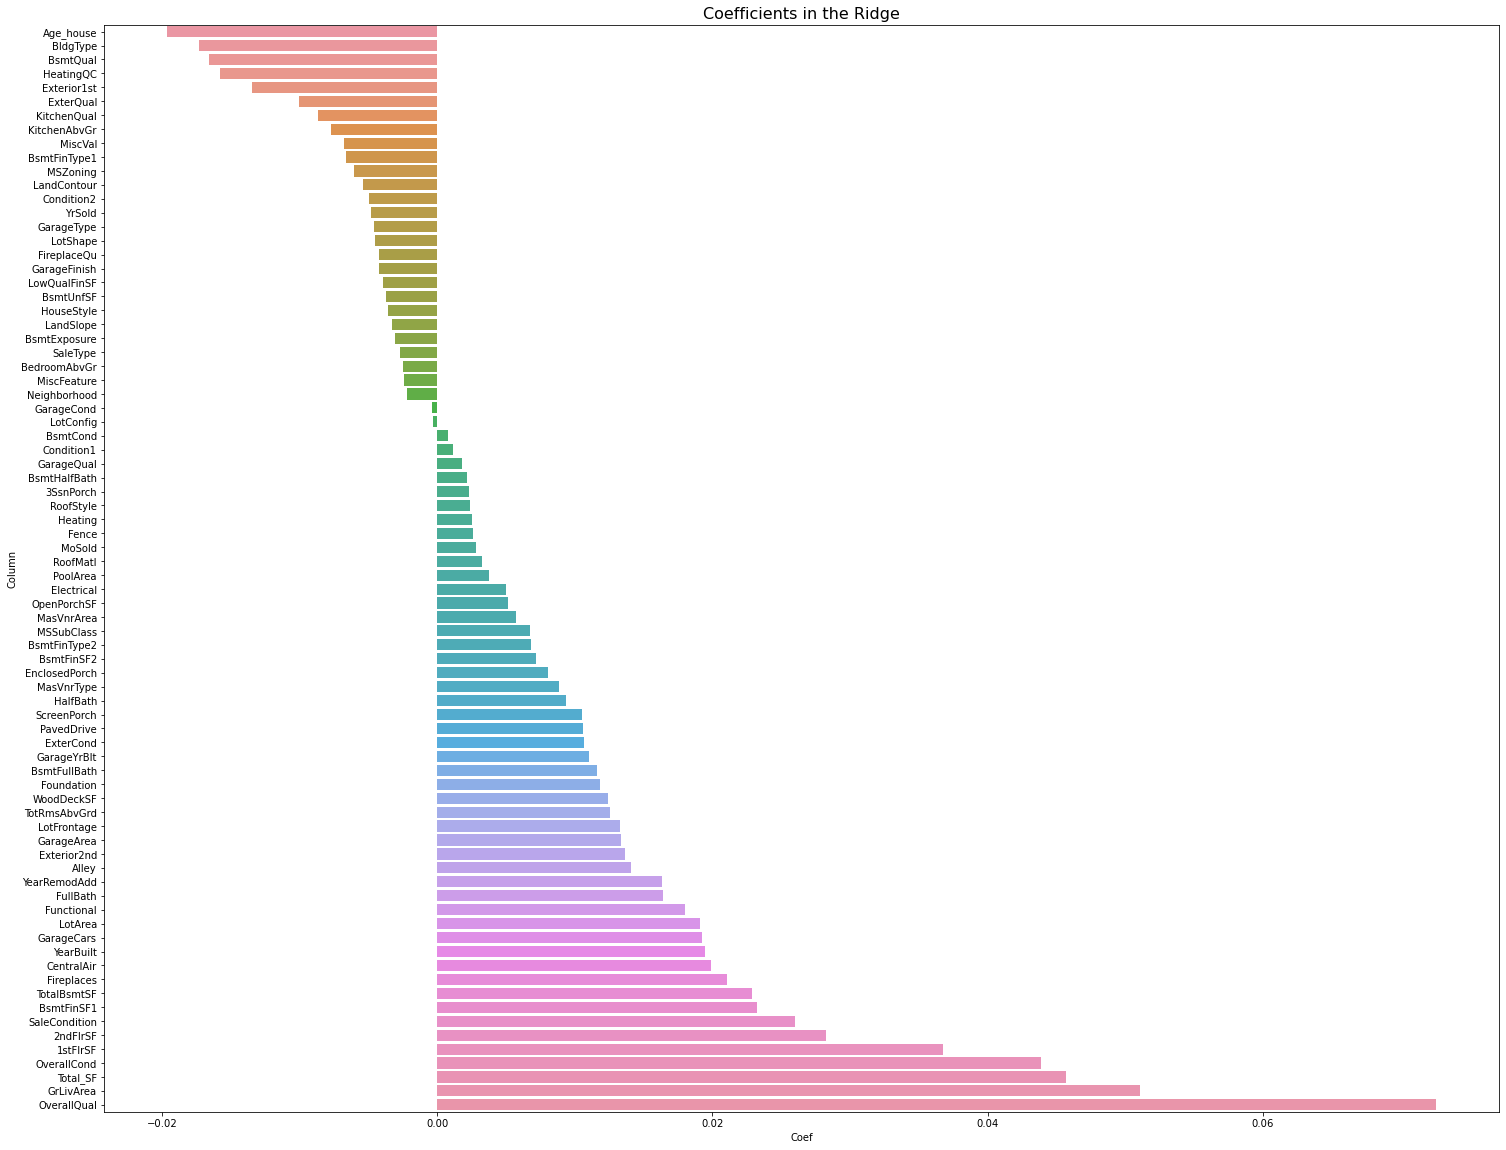

In [39]:
# Ridge
parameter_Ridge = {'alpha': [1e-4, 1e-3, 1e-2, 0.1, 0.5, 1, 5, 10, 50, 100, 200, 500], 
                   'tol': [1e-06, 1e-05, 5e-05, 1e-04, 5e-04, 1e-03]}
metrics_Ridge = model_display_metrics(Ridge, X_train, y_train, X_test, y_test, param=parameter_Ridge,
                                  model_params=dict(random_state=10))

In [40]:
# Параметры для HuberRegressor
HuberRegressor().get_params().keys()

dict_keys(['alpha', 'epsilon', 'fit_intercept', 'max_iter', 'tol', 'warm_start'])

HuberRegressor
Fitting 10 folds for each of 320 candidates, totalling 3200 fits
Best estimator for HuberRegressor: HuberRegressor(alpha=500, epsilon=3, tol=1e-10)
Best score for HuberRegressor: 0.9098383734911716
Params for HuberRegressor: {'alpha': 500, 'epsilon': 3, 'tol': 1e-10}
MAE: 0.09
MSE: 0.018
MAPE: 0.008
R^2: 0.882


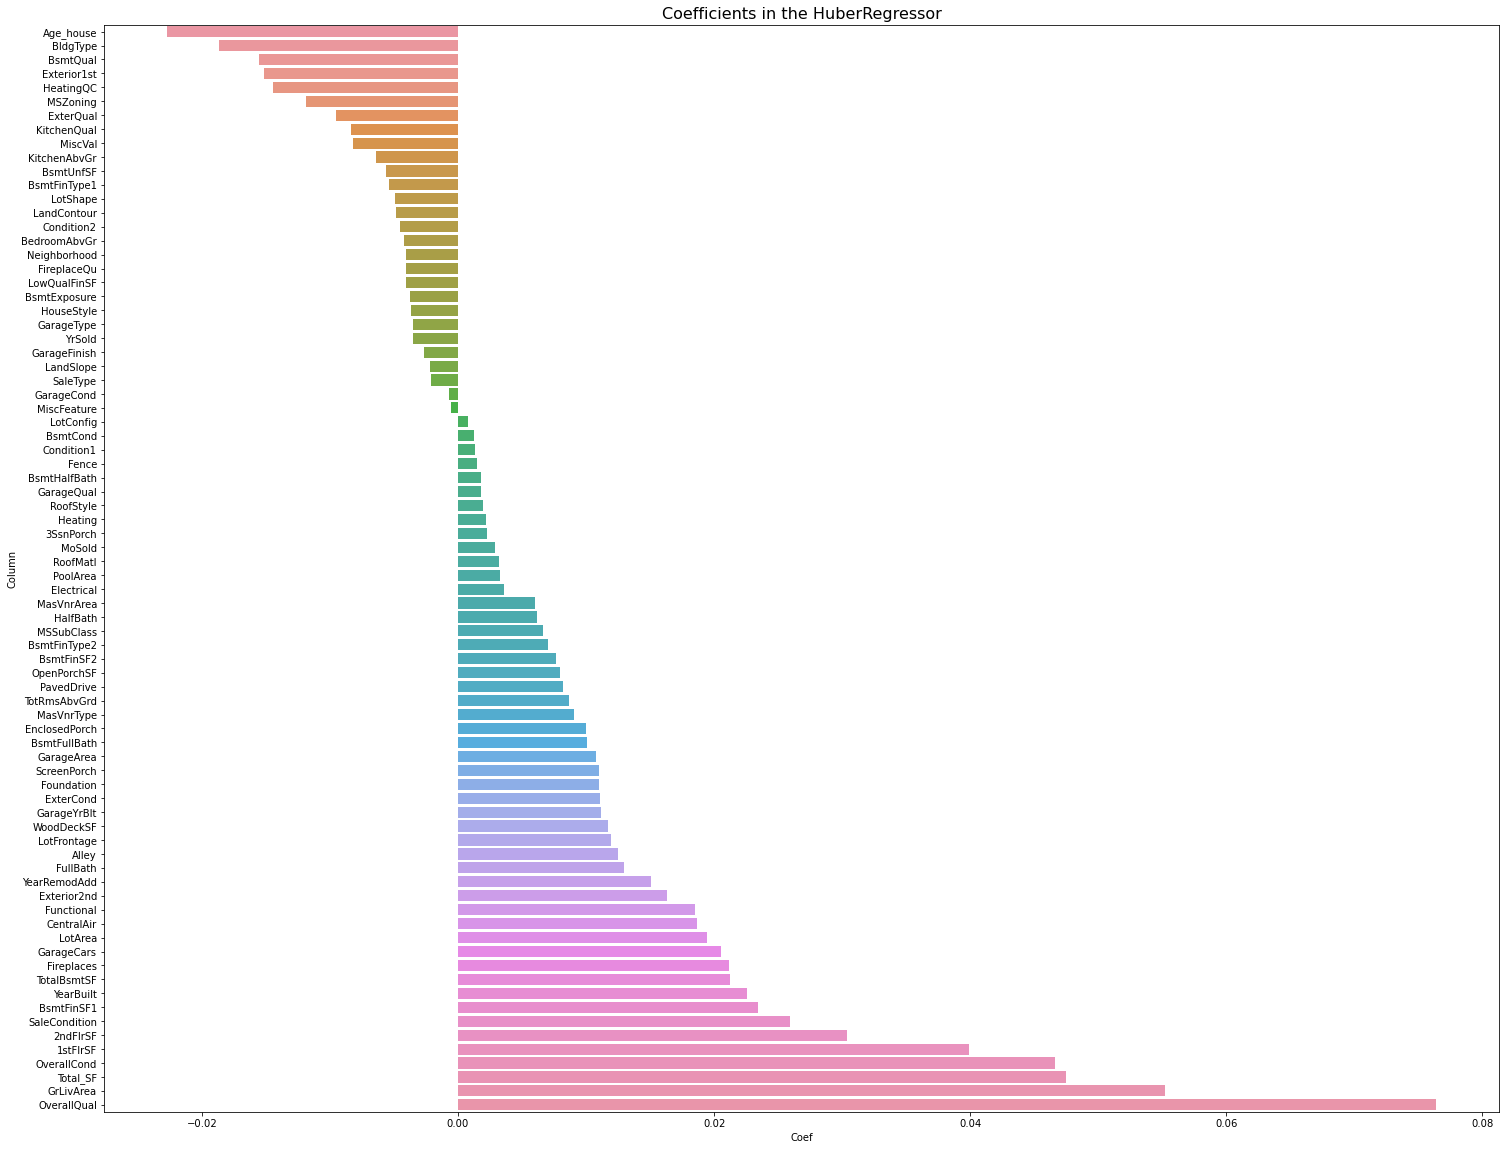

In [41]:
# HuberRegressor
parameter_Huber = {'alpha': [10, 50, 100, 200, 500, 1000, 1500, 2000], 
                   'tol': [1e-10, 1e-09, 1e-08, 1e-07], 
                   'epsilon': [1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6]}
metrics_Huber = model_display_metrics(HuberRegressor, X_train, y_train, X_test, y_test, param=parameter_Huber)

In [42]:
# Параметры для ElasticNet
ElasticNet().get_params().keys()

dict_keys(['alpha', 'copy_X', 'fit_intercept', 'l1_ratio', 'max_iter', 'normalize', 'positive', 'precompute', 'random_state', 'selection', 'tol', 'warm_start'])

ElasticNet
Fitting 10 folds for each of 576 candidates, totalling 5760 fits
Best estimator for ElasticNet: ElasticNet(alpha=0.01, l1_ratio=0.2, random_state=3, tol=0.01)
Best score for ElasticNet: 0.9097771379553276
Params for ElasticNet: {'alpha': 0.01, 'l1_ratio': 0.2, 'tol': 0.01}
MAE: 0.09
MSE: 0.017
MAPE: 0.008
R^2: 0.889


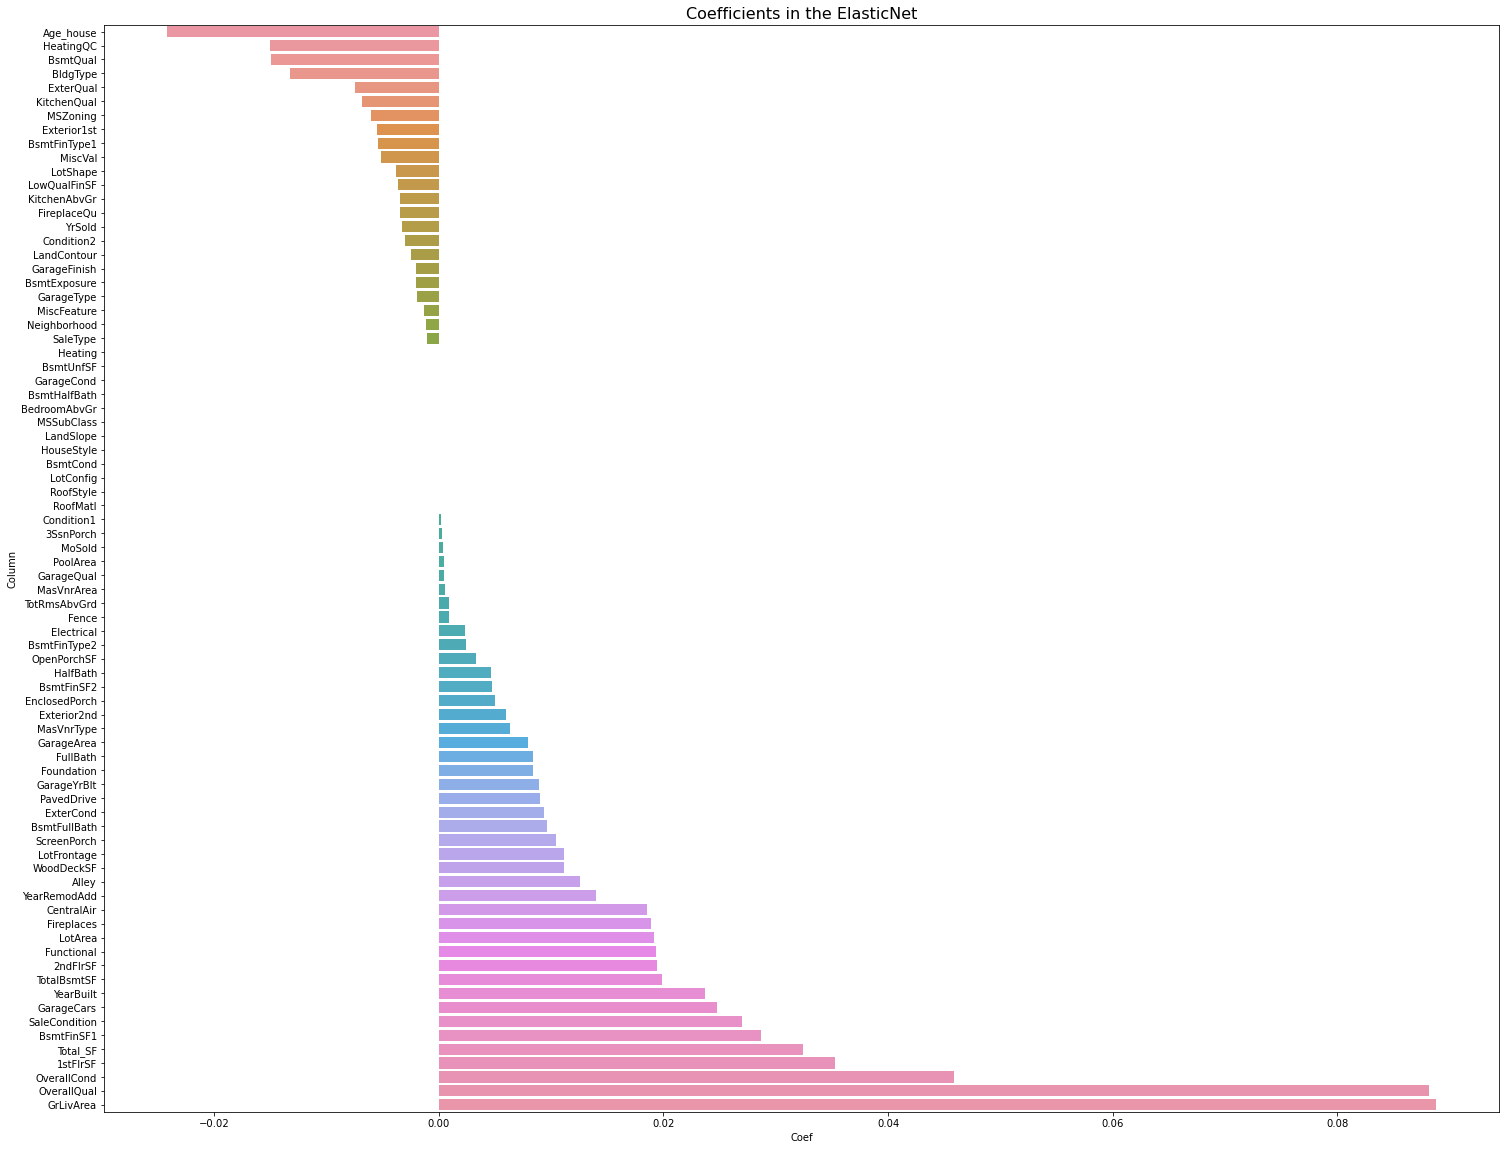

In [43]:
# ElasticNet
parameter_Elastic = {'alpha': [1e-04, 1e-03, 0.01, 0.1, 0.5, 1, 5, 10], 
                   'tol': [1e-07, 1e-06, 1e-05, 5e-05, 1e-04, 5e-04, 1e-03, 1e-02], 
                   'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}
metrics_Elastic = model_display_metrics(ElasticNet, X_train, y_train, X_test, y_test, param=parameter_Elastic,
                                       model_params=dict(random_state=3))

In [44]:
# Таблица модели - метрики с указанием подобранных параметров (сортировка по колонке r^2, по убыванию). 
pd.options.display.max_colwidth = 150
metrics_common = [metrics_Linear, metrics_Lasso, metrics_Lasso_poly, metrics_Ridge, metrics_Huber, metrics_Elastic]
data_metrics = pd.DataFrame(data=metrics_common, 
                            columns=['MAE', 'MSE', 'MAPE', 'R2', 'best_estimator', 'best_params', 'best_score'],
                            index=['LinearRegression', 'Lasso', 'Lasso polynomial (n=2)', 'Ridge', 'HuberRegressor', 
                                   'ElasticNet'])
data_metrics.sort_values(by='R2', ascending=False)

,MAE,MSE,MAPE,R2,best_estimator,best_params,best_score
ElasticNet,0.090,0.017,0.008,0.889,"ElasticNet(alpha=0.01, l1_ratio=0.2, random_state=3, tol=0.01)","{'alpha': 0.01, 'l1_ratio': 0.2, 'tol': 0.01}",0.909777
Ridge,0.090,0.017,0.008,0.887,"Ridge(alpha=100, random_state=10, tol=1e-06)","{'alpha': 100, 'tol': 1e-06}",0.909047
Lasso polynomial (n=2),0.090,0.017,0.008,0.886,"Lasso(alpha=0.01, random_state=32, tol=0.001)","{'alpha': 0.01, 'tol': 0.001}",0.909262
Lasso,0.091,0.017,0.008,0.885,"Lasso(alpha=0.001, random_state=42, tol=0.0005)","{'alpha': 0.001, 'tol': 0.0005}",0.908978
HuberRegressor,0.090,0.018,0.008,0.882,"HuberRegressor(alpha=500, epsilon=3, tol=1e-10)","{'alpha': 500, 'epsilon': 3, 'tol': 1e-10}",0.909838
LinearRegression,0.092,0.018,0.008,0.881,LinearRegression(n_jobs=-1),"{'fit_intercept': True, 'n_jobs': -1}",0.907828
